<a href="https://colab.research.google.com/github/aderdouri/PINNs/blob/master/Training/Heat_1D_deepxde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepxde

In [3]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
import matplotlib.pyplot as plt

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [4]:
k = 0.4
L = 1
n = 1

In [5]:
geom = dde.geometry.Interval(0,L)
timedomain = dde.geometry.TimeDomain(0,n)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [6]:
ic = dde.icbc.IC(geomtime, lambda x: np.sin(n* np.pi * x[:,0:1]/L), lambda _, on_initial: on_initial)

In [7]:
input_array = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]])

lambda_function = lambda x : 2*x[:,0:1]

result_array = lambda_function(input_array)

print(result_array)

[[ 2]
 [ 8]
 [14]]


In [8]:
cond_lambda = lambda x : "Even" if x%2 == 0 else "Odd"
print(cond_lambda(4))
print(cond_lambda(3))

Even
Odd


In [9]:
def double_first_column(input_array):
    print("input_array", input_array)
    print("input_array.shape", input_array.shape)
    print("input_array[:, 0:1]", input_array[:, 0:1])
    print("input_array[:, 0:1].shape", input_array[:, 0:1].shape)
    print("input_array[:, 0]", input_array[:, 0])
    print("input_array[:, 0].shape", input_array[:, 0].shape)
    return 2 * input_array[:, 0:1]

bc = dde.icbc.DirichletBC(
    geomtime,
    lambda input_array: double_first_column(input_array),
    lambda _,
    on_boundary: on_boundary)

In [10]:
def pde(comp,u):
    du_t = dde.grad.jacobian(u,comp, i=0,j=1)
    du_xx = dde.grad.hessian(u,comp, i=0,j=0)
    return du_t - k * du_xx

In [11]:
data = dde.data.TimePDE(geomtime,
                       pde,
                       [bc,ic],
                       num_domain = 2540,
                       num_boundary = 80,
                       num_initial = 160,
                       num_test = 2540,
                       )

In [12]:
net = dde.nn.FNN([2] + [20]*3+ [1], "tanh", "Glorot normal")

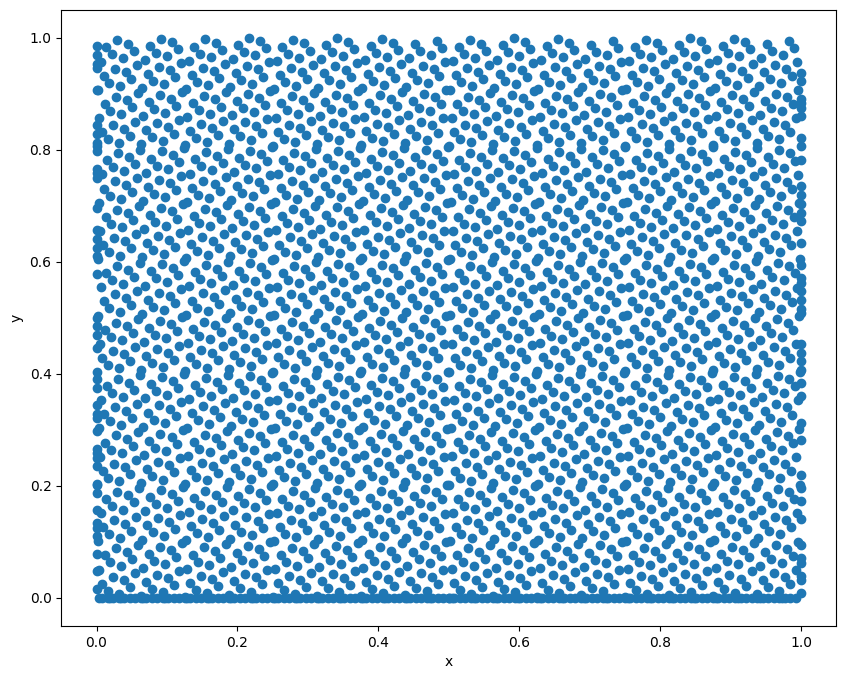

In [13]:
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
model = dde.Model(data, net)

In [15]:
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.107928 s

input_array [[1.        0.671875 ]
 [0.        0.65625  ]
 [0.        0.296875 ]
 [1.        0.0390625]
 [0.        0.796875 ]
 [0.        0.46875  ]
 [1.        0.1953125]
 [1.        0.0078125]
 [1.        0.875    ]
 [0.        0.8125   ]
 [0.        0.25     ]
 [1.        0.53125  ]
 [0.        0.046875 ]
 [1.        0.5703125]
 [0.        0.5      ]
 [0.        0.7578125]
 [1.        0.734375 ]
 [0.        0.1328125]
 [0.        0.2578125]
 [1.        0.59375  ]
 [1.        0.3828125]
 [1.        0.5625   ]
 [1.        0.921875 ]
 [0.        0.75     ]
 [0.        0.015625 ]
 [0.        0.90625  ]
 [0.        0.328125 ]
 [1.        0.28125  ]
 [0.        0.578125 ]
 [1.        0.890625 ]
 [0.        0.390625 ]
 [0.        0.1875   ]
 [0.        0.84375  ]
 [1.        0.03125  ]
 [0.        0.109375 ]
 [1.        0.453125 ]
 [1.        0.171875 ]
 [1.        0.6875   ]
 [1.        0.359375 ]
 [1.   

In [16]:
losshistory, train_state = model.train(iterations = 15000)

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.72e-02, 1.93e+00, 3.92e-01]    [3.57e-02, 1.93e+00, 3.92e-01]    []  
1000      [7.19e-03, 6.60e-02, 1.62e-01]    [5.75e-03, 6.60e-02, 1.62e-01]    []  
2000      [4.35e-03, 2.47e-02, 1.65e-02]    [2.57e-03, 2.47e-02, 1.65e-02]    []  
3000      [2.77e-03, 1.63e-02, 1.14e-02]    [1.62e-03, 1.63e-02, 1.14e-02]    []  
4000      [1.93e-03, 1.38e-02, 9.80e-03]    [1.19e-03, 1.38e-02, 9.80e-03]    []  
5000      [1.64e-03, 1.23e-02, 8.81e-03]    [1.17e-03, 1.23e-02, 8.81e-03]    []  
6000      [1.44e-03, 1.10e-02, 8.00e-03]    [1.05e-03, 1.10e-02, 8.00e-03]    []  
7000      [8.26e-03, 1.02e-02, 6.88e-03]    [2.25e-03, 1.02e-02, 6.88e-03]    []  
8000      [1.72e-03, 9.14e-03, 6.21e-03]    [8.54e-04, 9.14e-03, 6.21e-03]    []  
9000      [1.37e-03, 8.41e-03, 5.43e-03]    [9.17e-04, 8.41e-03, 5.43e-03]    []  
10000     [1.54e-03, 7.71e-03, 4.90e-03]    [1.06e-03, 7.71e-

In [17]:
#Limited-memory Broyden-Fletcher-Goldfarb-Shanno
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
input_array [[1.        0.671875 ]
 [0.        0.65625  ]
 [0.        0.296875 ]
 [1.        0.0390625]
 [0.        0.796875 ]
 [0.        0.46875  ]
 [1.        0.1953125]
 [1.        0.0078125]
 [1.        0.875    ]
 [0.        0.8125   ]
 [0.        0.25     ]
 [1.        0.53125  ]
 [0.        0.046875 ]
 [1.        0.5703125]
 [0.        0.5      ]
 [0.        0.7578125]
 [1.        0.734375 ]
 [0.        0.1328125]
 [0.        0.2578125]
 [1.        0.59375  ]
 [1.        0.3828125]
 [1.        0.5625   ]
 [1.        0.921875 ]
 [0.        0.75     ]
 [0.        0.015625 ]
 [0.        0.90625  ]
 [0.        0.328125 ]
 [1.        0.28125  ]
 [0.        0.578125 ]
 [1.        0.890625 ]
 [0.        0.390625 ]
 [0.        0.1875   ]
 [0.        0.84375  ]
 [1.        0.03125  ]
 [0.        0.109375 ]
 [1.        0.453125 ]
 [1.        0.171875 ]
 [1.        0.6875   ]
 [1.        0.359375 ]
 [1.        0.5078125]
 [0.        0.203125 ]
 [1.        0.859375 ]
 [1

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


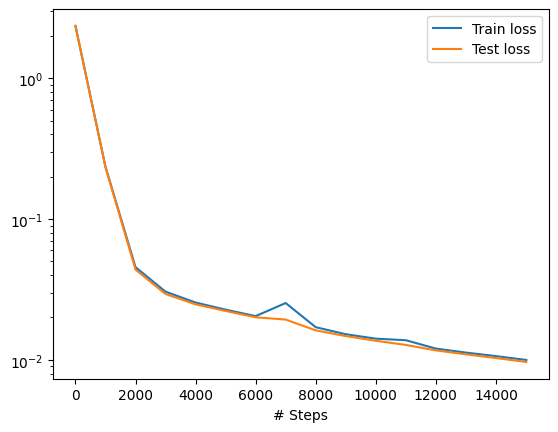

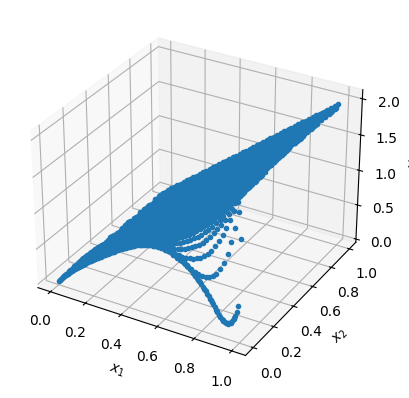

In [18]:
dde.saveplot(losshistory,train_state, issave= True, isplot=True)